In [1]:
import pandas as pd
import numpy as np
import statistics
from datetime import datetime
import datetime
import random
import itertools
from scipy.stats import norm
#import seaborn as sns
import math
import random
import sklearn
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [2]:
data= pd.read_csv(r'C:\Users\moreno.l.5\Procter and Gamble\Idigoras, Anne - Project\Shipments\total shipments.csv')
#data = data[data['Category'] == 'CHAMPUS']
data = data.drop(columns=['Sub Sector','Category'])
data = data.groupby('Date').sum()
data = data.reset_index()
data = data[data['Date']!= '2021-03']
data.head()  


,Date,Shipment MSU Internal
1,2021-04,449.1154
2,2021-05,490.1723
3,2021-06,510.3922
4,2021-07,769.3373
5,2021-08,656.6378


In [3]:
# Creating date range in correct format
idx = pd.to_datetime(data['Date'], format='%Y-%m')

# Creating series with correct dates and units sold
ts = pd.Series(data['Shipment MSU Internal'].tolist(), index=idx)

ts

Date
2021-04-01    449.1154
2021-05-01    490.1723
2021-06-01    510.3922
2021-07-01    769.3373
2021-08-01    656.6378
2021-09-01    591.6072
2021-10-01    592.9687
2021-11-01    581.8166
2021-12-01    567.4331
2022-01-01    586.8915
2022-02-01    489.9489
2022-03-01    518.9840
2022-04-01    503.5924
2022-05-01    474.3591
2022-06-01    527.9054
2022-07-01    568.9114
2022-08-01    612.6952
2022-09-01    530.1883
2022-10-01    507.5472
2022-11-01    479.3923
2022-12-01    382.6127
2023-01-01    588.2797
2023-02-01    486.1991
2023-03-01    460.4706
2023-04-01    452.7198
2023-05-01    447.9863
2023-06-01    480.2413
2023-07-01    499.1886
2023-08-01    519.7945
2023-09-01    487.0379
2023-10-01    475.4343
2023-11-01    559.8725
2023-12-01    366.4891
2024-01-01    546.5296
2024-02-01    459.6114
2024-03-01    391.5377
dtype: float64

In [4]:
import matplotlib.pylab as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from pylab import rcParams

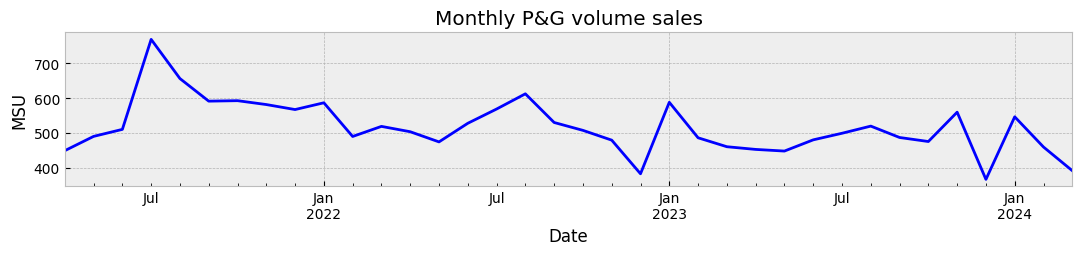

In [12]:
plt.style.use('bmh')

ax = ts.plot(color = 'blue', figsize=(13,2))

ax.set_ylabel('MSU')
ax.set_title('Monthly P&G volume sales')

plt.show()

In [32]:
ts.index

DatetimeIndex(['2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

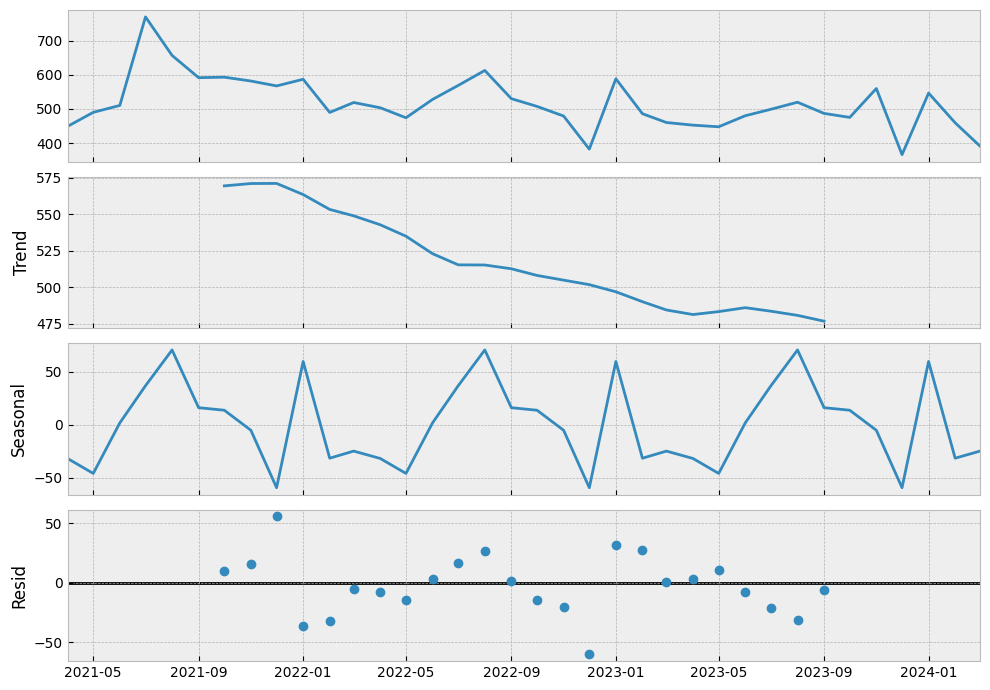

In [13]:
ts = ts.asfreq(pd.infer_freq(ts.index))

rcParams['figure.figsize'] = 10, 7

# Use the seasonal_decompose function
decomposition = sm.tsa.seasonal_decompose(ts)

fig = decomposition.plot()

plt.show()

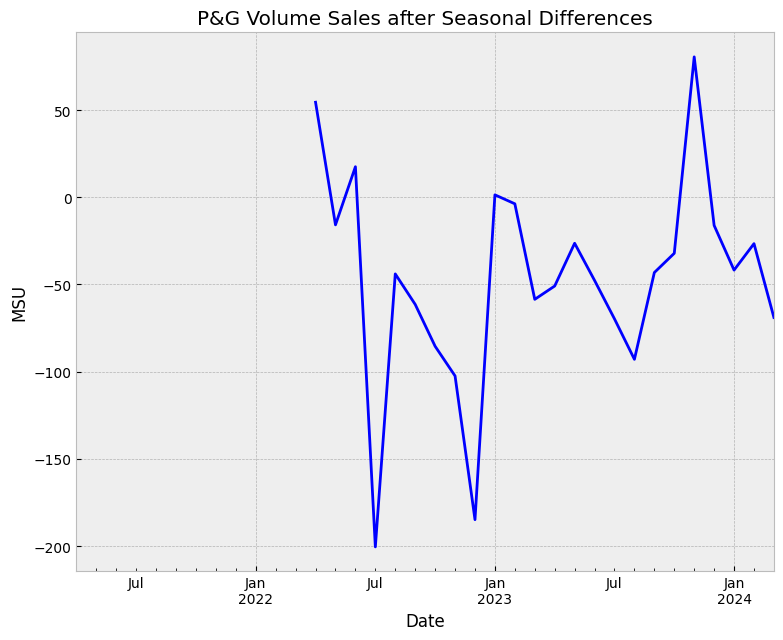

In [14]:
# Use the diff() function to resolve the seasonality first
season_diff = ts.diff(12)

ax = season_diff.plot(color = 'blue', figsize=(9,7))

ax.set_ylabel('MSU')

ax.set_title('P&G Volume Sales after Seasonal Differences')

plt.show()

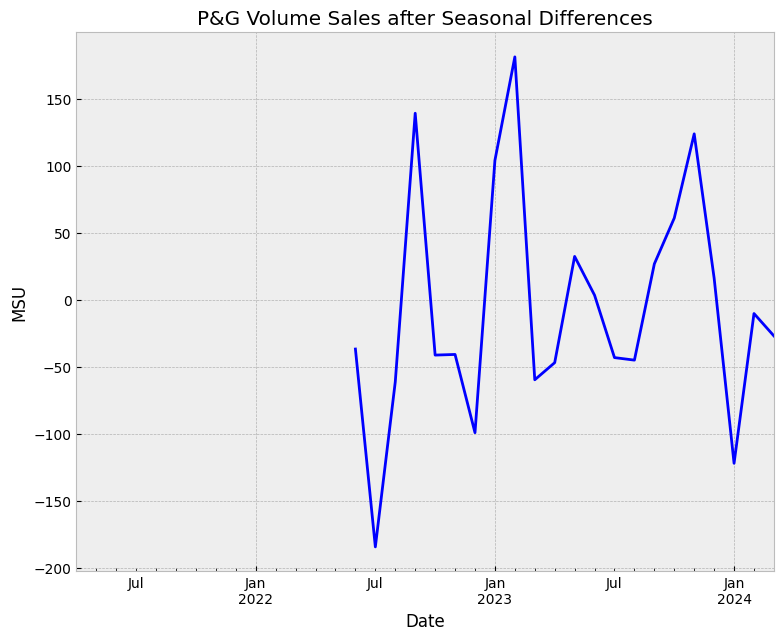

In [17]:
# Use the diff() function to resolve the trend
trend_and_season_diff = season_diff.diff(2)

ax = trend_and_season_diff.plot(color = 'blue', figsize=(9,7))

ax.set_ylabel('MSU')

ax.set_title('P&G Volume Sales after Seasonal Differences')

plt.show()

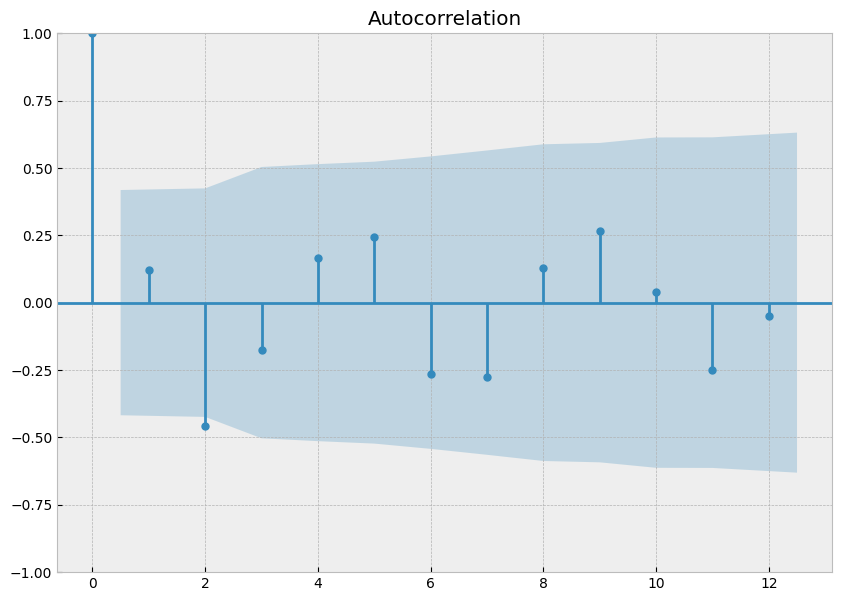

In [18]:
#Remember that the correlation functions cannot handle missing values which you might have after differencing.
season_diff = season_diff.dropna()
trend_and_season_diff = trend_and_season_diff.dropna()

# Use a function from the tsaplots module of statsmodels
fig = tsaplots.plot_acf(trend_and_season_diff, lags = 12)

plt.show()

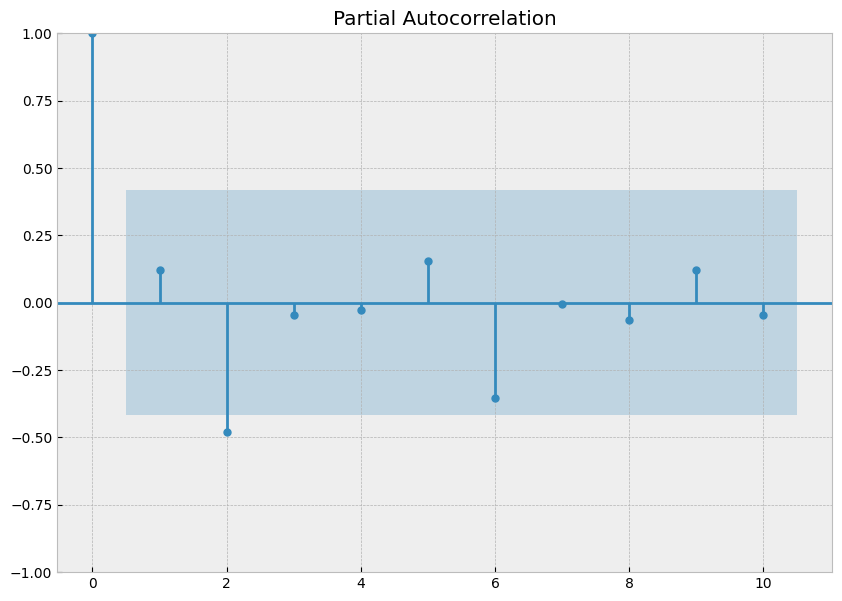

In [20]:
# Use a function from the tsaplots module of statsmodels
fig = tsaplots.plot_pacf(trend_and_season_diff, lags = 10)

plt.show()

In [21]:
# Fill in some possible values for p,d,q, P,D,Q,S
mod_ld = SARIMAX(ts, order=(1,1,0), seasonal_order=(1,1,0,12))

res_ld = mod_ld.fit()
print(res_ld.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -131.264
Date:                            Mon, 13 May 2024   AIC                            268.528
Time:                                    16:49:35   BIC                            271.934
Sample:                                04-01-2021   HQIC                           269.385
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4518      0.216     -2.095      0.036      -0.875      -0.029
ar.S.L12      -0.0551      0.383   